## Some simple statistics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot
%matplotlib inline
plt.rcParams["figure.figsize"] = [12,7]

from datasets import *


def get_components(DecomposeResult):
    df = pd.DataFrame({
        'observed': DecomposeResult.observed,
        'resid': DecomposeResult.resid,
        'seasonal': DecomposeResult.seasonal,
        'trend': DecomposeResult.trend
    })
    return df

In [2]:
tourism.drop(columns='Quarter').groupby(['Region', 'State', 'Purpose'], as_index=False).mean()

,Region,State,Purpose,Trips
0,Adelaide,South Australia,Business,155.527910
1,Adelaide,South Australia,Holiday,156.543437
2,Adelaide,South Australia,Other,56.563450
3,Adelaide,South Australia,Visiting,205.193667
4,Adelaide Hills,South Australia,Business,2.664236
...,...,...,...,...
299,Wimmera,Victoria,Visiting,14.879986
300,Yorke Peninsula,South Australia,Business,6.892481
301,Yorke Peninsula,South Australia,Holiday,80.088485
302,Yorke Peninsula,South Australia,Other,1.885884


In [3]:
tourism.drop(
    columns='Quarter'
).groupby(
    ['Region', 'State', 'Purpose'], as_index=False
).mean(
).rename(
    {'Trips': 'mean'}, axis=1
).sort_values(
    'mean'
)

,Region,State,Purpose,mean
158,Kangaroo Island,South Australia,Other,0.340347
182,MacDonnell,Northern Territory,Other,0.449004
294,Wilderness West,Tasmania,Other,0.478268
34,Barkly,Northern Territory,Other,0.632386
86,Clare Valley,South Australia,Other,0.897749
...,...,...,...,...
269,Sydney,New South Wales,Holiday,550.326865
217,North Coast NSW,New South Wales,Holiday,587.896632
268,Sydney,New South Wales,Business,602.043884
199,Melbourne,Victoria,Visiting,618.897541


In [4]:
tourism.drop(columns='Quarter').groupby(['Region', 'State', 'Purpose'], as_index=False).quantile([0, 0.25, 0.5, 0.75, 1])


Region            State   Purpose       Trips
0   0.00         Adelaide  South Australia  Business   68.725393
    0.25         Adelaide  South Australia  Business  133.893462
    0.50         Adelaide  South Australia  Business  152.576618
    0.75         Adelaide  South Australia  Business  176.935536
    1.00         Adelaide  South Australia  Business  242.494367
...                   ...              ...       ...         ...
303 0.00  Yorke Peninsula  South Australia  Visiting    8.041249
    0.25  Yorke Peninsula  South Australia  Visiting   21.608759
    0.50  Yorke Peninsula  South Australia  Visiting   26.970494
    0.75  Yorke Peninsula  South Australia  Visiting   34.052298
    1.00  Yorke Peninsula  South Australia  Visiting   56.202511

[1520 rows x 4 columns]

In [5]:
tourism.drop(columns='Quarter').groupby(['Region', 'State', 'Purpose'])['Trips'].quantile(q=[0, 0.25, 0.5, 0.75, 1]).unstack().reset_index()

,Region,State,Purpose,0.0,0.25,0.5,0.75,1.0
0,Adelaide,South Australia,Business,68.725393,133.893462,152.576618,176.935536,242.494367
1,Adelaide,South Australia,Holiday,108.033040,134.626822,153.945007,172.256677,223.557406
2,Adelaide,South Australia,Other,25.901846,43.865901,53.809463,62.523135,107.494657
3,Adelaide,South Australia,Visiting,136.611154,178.915998,205.581736,229.299111,269.535618
4,Adelaide Hills,South Australia,Business,0.000000,0.000000,1.255434,3.920368,28.601515
...,...,...,...,...,...,...,...,...
299,Wimmera,Victoria,Visiting,1.307505,10.800154,13.863049,19.222546,42.516814
300,Yorke Peninsula,South Australia,Business,0.000000,3.161881,5.727692,9.023333,23.062615
301,Yorke Peninsula,South Australia,Holiday,34.078872,58.180385,77.624339,96.779303,138.035726
302,Yorke Peninsula,South Australia,Other,0.000000,0.500451,1.288070,2.789666,13.903678


In [6]:
tourism.drop(columns='Quarter').groupby(['Region', 'State', 'Purpose'])['Trips'].describe().reset_index()

,Region,State,Purpose,count,mean,std,min,25%,50%,75%,max
0,Adelaide,South Australia,Business,80.0,155.527910,35.646424,68.725393,133.893462,152.576618,176.935536,242.494367
1,Adelaide,South Australia,Holiday,80.0,156.543437,27.063233,108.033040,134.626822,153.945007,172.256677,223.557406
2,Adelaide,South Australia,Other,80.0,56.563450,17.340788,25.901846,43.865901,53.809463,62.523135,107.494657
3,Adelaide,South Australia,Visiting,80.0,205.193667,32.499407,136.611154,178.915998,205.581736,229.299111,269.535618
4,Adelaide Hills,South Australia,Business,80.0,2.664236,4.296483,0.000000,0.000000,1.255434,3.920368,28.601515
...,...,...,...,...,...,...,...,...,...,...,...
299,Wimmera,Victoria,Visiting,80.0,14.879986,7.462415,1.307505,10.800154,13.863049,19.222546,42.516814
300,Yorke Peninsula,South Australia,Business,80.0,6.892481,5.084377,0.000000,3.161881,5.727692,9.023333,23.062615
301,Yorke Peninsula,South Australia,Holiday,80.0,80.088485,26.145673,34.078872,58.180385,77.624339,96.779303,138.035726
302,Yorke Peninsula,South Australia,Other,80.0,1.885884,2.245611,0.000000,0.500451,1.288070,2.789666,13.903678


## ACF features

In [7]:
def acf_features(df, var):
    def acf_coefs(x):
        autocorrs = []
        for i in range(1, 11):
            autocorrs.append(x.autocorr(lag=i))

        acf1 = autocorrs[0]
        acf10 = sum([coef**2 for coef in autocorrs])
        #print(autocorrs)
        #return autocorrs
        return (acf1, acf10)

    original_data_acfs = acf_coefs(df[var])
    diff1_data_acfs = acf_coefs(df[var].diff(periods=1))
    diff2_data_acfs = acf_coefs(df[var].diff(periods=1).diff(periods=1))
    return pd.DataFrame({
        'acf1': original_data_acfs[0],
        'acf10': original_data_acfs[1],
        'diff1_acf1': diff1_data_acfs[0],
        'diff1_acf10': diff1_data_acfs[1],
        'diff2_acf1': diff2_data_acfs[0],
        'diff2_acf10': diff2_data_acfs[1]
    }, index=[1])
    

In [8]:
tourism.groupby(['Region', 'State', 'Purpose']).apply(lambda x: acf_features(x, 'Trips'))

acf1     acf10  diff1_acf1  \
Region          State           Purpose                                      
Adelaide        South Australia Business 1  0.033747  0.147441   -0.520696   
                                Holiday  1  0.048006  0.519491   -0.362272   
                                Other    1  0.520506  1.559450   -0.416583   
                                Visiting 1  0.069183  0.340059   -0.400511   
Adelaide Hills  South Australia Business 1  0.071204  0.144572   -0.579912   
...                                              ...       ...         ...   
Wimmera         Victoria        Visiting 1  0.157857  0.092553   -0.399496   
Yorke Peninsula South Australia Business 1  0.031348  0.140475   -0.415320   
                                Holiday  1 -0.005335  2.417152   -0.148840   
                                Other    1 -0.108659  0.276912   -0.719777   
                                Visiting 1  0.069286  0.249922   -0.356340   

                                            diff1_acf10  diff2_acf1  \
Region          State           Purpose                               
Adelaide        South Australia Business 1     0.480308   -0.680290   
                                Holiday  1     0.755314   -0.508050   
                                Other    1     0.407741   -0.683430   
                                Visiting 1     0.492780   -0.529266   
Adelaide Hills  South Australia Business 1     0.424875   -0.752904   
...                                                 ...         ...   
Wimmera         Victoria        Visiting 1     0.247707   -0.632037   
Yorke Peninsula South Australia Business 1     0.343489   -0.578901   
                                Holiday  1     2.505294   -0.260421   
                                Other    1     0.983263   -0.796429   
                                Visiting 1     0.490539   -0.540299   

                                            diff2_acf10  
Region          State           Purpose                  
Adelaide        South Australia Business 1     0.764780  
                                Holiday  1     0.644004  
                                Other    1     0.827003  
                                Visiting 1     0.483793  
Adelaide Hills  South Australia Business 1     0.775384  
...                                                 ...  
Wimmera         Victoria        Visiting 1     0.531722  
Yorke Peninsula South Australia Business 1     0.430492  
                                Holiday  1     1.911144  
                                Other    1     1.248799  
                                Visiting 1     0.522011  

[304 rows x 6 columns]

## STL Features

In [16]:
test_ts = tourism.query('Region == "Adelaide" & State == "South Australia" & Purpose == "Other"')

In [17]:
test_ts

,Quarter,Region,State,Purpose,Trips
160,1998 Q1,Adelaide,South Australia,Other,58.362689
161,1998 Q2,Adelaide,South Australia,Other,39.468735
162,1998 Q3,Adelaide,South Australia,Other,38.431629
163,1998 Q4,Adelaide,South Australia,Other,33.791523
164,1999 Q1,Adelaide,South Australia,Other,25.901846
...,...,...,...,...,...
235,2016 Q4,Adelaide,South Australia,Other,83.548785
236,2017 Q1,Adelaide,South Australia,Other,93.827099
237,2017 Q2,Adelaide,South Australia,Other,82.588984
238,2017 Q3,Adelaide,South Australia,Other,96.077565


In [42]:
from statsmodels.tsa.seasonal import STL

def stl_features(df, var):
    stl = STL(df[var], seasonal=13, period=4)
    dcmp = stl.fit()
    components = get_components(dcmp)
    
    trend_strength = np.maximum(0, 1 - components.resid.var() / np.var(components.resid + components.trend))
    seasonal_strength = np.maximum(0, 1 - components.resid.var() / np.var(components.resid + components.seasonal))
    seasonal_peak_year = df.loc[components.seasonal.idxmax(), 'Quarter'][-1:]
    seasonal_trough_year = df.loc[components.seasonal.idxmin(), 'Quarter'][-1:]
    
    out = pd.DataFrame({'trend_strength': trend_strength,
                 'seasonal_strength': seasonal_strength,
                 'seasonal_peak_year': seasonal_peak_year,
                 'seasonal_trough_year': seasonal_trough_year},
                index=[1])
    return out
    
def trend_strength(components):
    return np.maximum(0, 1 - components.resid.var() / np.var(components.resid + components.trend))

def seasonal_strength(components):
    return np.maximum(0, 1 - components.resid.var() / np.var(components.resid + components.seasonal))

In [43]:
tourism.groupby(['Region', 'State', 'Purpose']).apply(lambda x: stl_features(x, 'Trips'))

trend_strength  seasonal_strength  \
Region          State           Purpose                                         
Adelaide        South Australia Business 1        0.454989           0.383020   
                                Holiday  1        0.572469           0.633091   
                                Other    1        0.743251           0.199292   
                                Visiting 1        0.441978           0.469409   
Adelaide Hills  South Australia Business 1        0.452710           0.157329   
...                                                    ...                ...   
Wimmera         Victoria        Visiting 1        0.471995           0.189644   
Yorke Peninsula South Australia Business 1        0.424197           0.403872   
                                Holiday  1        0.442148           0.827580   
                                Other    1        0.376615           0.305413   
                                Visiting 1        0.500086           0.517305   

                                           seasonal_peak_year  \
Region          State           Purpose                         
Adelaide        South Australia Business 1                  3   
                                Holiday  1                  1   
                                Other    1                  2   
                                Visiting 1                  1   
Adelaide Hills  South Australia Business 1                  3   
...                                                       ...   
Wimmera         Victoria        Visiting 1                  2   
Yorke Peninsula South Australia Business 1                  3   
                                Holiday  1                  1   
                                Other    1                  3   
                                Visiting 1                  1   

                                           seasonal_trough_year  
Region          State           Purpose                          
Adelaide        South Australia Business 1                    1  
                                Holiday  1                    2  
                                Other    1                    3  
                                Visiting 1                    2  
Adelaide Hills  South Australia Business 1                    4  
...                                                         ...  
Wimmera         Victoria        Visiting 1                    3  
Yorke Peninsula South Australia Business 1                    1  
                                Holiday  1                    3  
                                Other    1                    2  
                                Visiting 1                    3  

[304 rows x 4 columns]

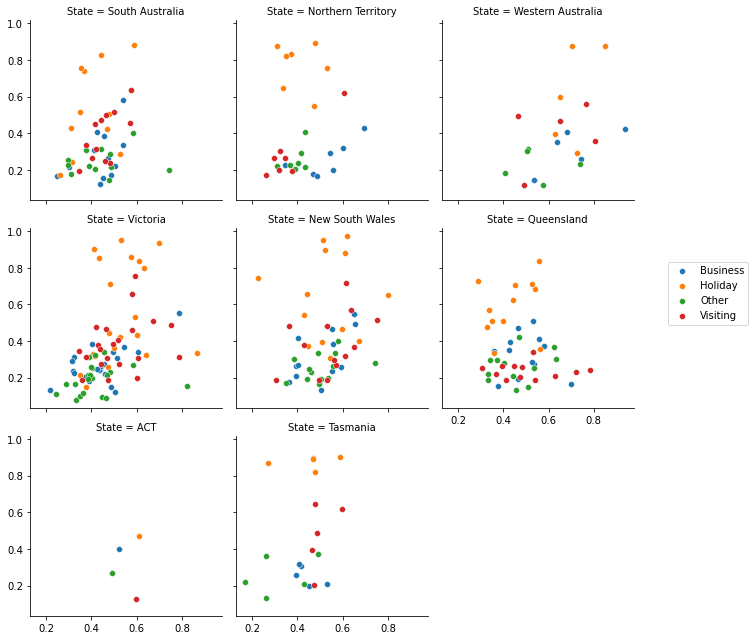

In [59]:
stl_feats = tourism.groupby(['Region', 'State', 'Purpose']).apply(lambda x: stl_features(x, 'Trips')).reset_index()
p = sns.FacetGrid(stl_feats, col='State', hue='Purpose', col_wrap=3)
p.map_dataframe(sns.scatterplot, x='trend_strength', y='seasonal_strength')
plt.legend(bbox_to_anchor=(2.7, 2));

<AxesSubplot:xlabel='Quarter'>

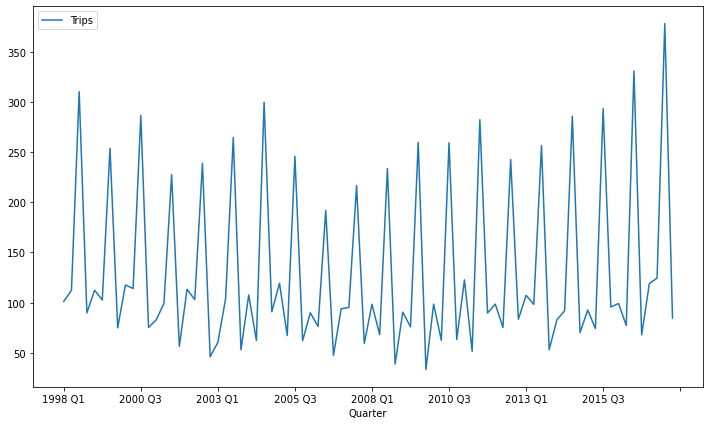

In [76]:
stl_feats.iloc[
    stl_feats.seasonal_strength.idxmax(), :
].to_frame(
).T.merge(
    tourism,
    on=['State', 'Region', 'Purpose']
).plot(x='Quarter', y='Trips')